In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\DAMMY\Desktop\datascience\thePoultry.csv")
df

,Establishment,Farm _Location,Education_Level,Gender,Production_system,Farm_Size,Years _in _Farming,Egg _Preference,Climate_Changes _Observed,Observed _Changes _Increased _Temperature,Observed _Changes _Decreased _Rainfall,Observed _Changes _ Extreme _Weather _Events,Any _Smart _Solutions _Implemented,Implemented _Smart _Solutions,Impact _on _Water _Availability,Impact _on _Bird _Health _and _Productivity,Future _of _Poultry _Farming,Government _Support _Climate _Change_ Adaptation,Other_ Climate _Change _Impacts,Additional _Information
0,Latwins Farms Ltd,"Lagos, Nigeria",Master's degree,male,Egg+Meat,More than 5000 birds,More than 10 years,Brown eggs,Yes,True,True,True,No,Shade structures,no,Negatively,bad,No,Non,Data on climate changes and its effects need t...
1,Barinda Farms,Lagos State,Bachelor's degree,male,Egg,1000-5000 birds,5-10 years,Brown eggs,No,NaN,NaN,NaN,Yes,Use of renewable energy sources,no,Negatively,good,Uncertain,No,No
2,Amazon Farms,Lagos State,High school diploma,male,Egg,Less than 500 birds,5-10 years,Brown eggs,Yes,True,True,NaN,No,NaN,no,Other (please specify):Low production of eggs,bad,Uncertain,No,NaN
3,IRRIGATE AGRO,Ogun State,Bachelor's degree,male,Egg,More than 5000 birds,5-10 years,Brown eggs,No,True,NaN,True,No,Shade structures,yes,Negatively,good,No,NaN,No
4,Nike Farms,Lagos State,Other (please specify):HND,female,Egg,Less than 500 birds,2-5 years,Brown eggs,Yes,True,NaN,True,No,Shade structures,no,Negatively,good,No,Very cold weather ( harmattan,Poultry farmers should be exposed to modern me...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Raphael Farm,Lagos State,High school diploma,male,Egg,Less than 500 birds,2-5 years,Brown eggs,Yes,NaN,True,True,Yes,Other (please specify):Heating vents,yes,Negatively,good,Yes,No other ways,No
58,Mia finger food,Lagos State,Bachelor's degree,male,Egg+Meat,1000-5000 birds,2-5 years,Brown eggs,Yes,True,NaN,True,Yes,Improved ventilation systems,yes,Other (please specify):Disease infestation.,good,No,The availability of farm feeds,None
59,Olaluwa poultry farming,Lagos State,Bachelor's degree,male,Egg+Meat,1000-5000 birds,5-10 years,Brown eggs,Yes,True,NaN,True,Yes,Shade structures,yes,Negatively,good,No,Inaccessibility of the farm Incases of overflo...,None
60,Vip Tech and farms,Ogun State,Other (please specify):NCE,male,Egg+Meat,Less than 500 birds,2-5 years,No preference,Yes,True,True,NaN,Yes,Shade structures,no,Positively,good,Yes,Cold on the smaller birds when it’s raining,Diseases


In [4]:
df.columns

Index(['Establishment', 'Farm _Location ', 'Education_Level', 'Gender',
       'Production_system', 'Farm_Size', 'Years _in _Farming',
       'Egg _Preference', 'Climate_Changes _Observed',
       'Observed _Changes _Increased _Temperature',
       'Observed _Changes _Decreased _Rainfall',
       'Observed _Changes _ Extreme _Weather _Events',
       'Any _Smart _Solutions _Implemented', 'Implemented _Smart _Solutions',
       'Impact _on _Water _Availability',
       'Impact _on _Bird _Health _and _Productivity',
       'Future _of _Poultry _Farming',
       'Government _Support _Climate _Change_ Adaptation',
       'Other_ Climate _Change _Impacts', 'Additional _Information'],
      dtype='object')

In [5]:
# Descriptive Analysis
# Compute frequency tables for categorical variables
categorical_columns = ['Establishment', 'Farm _Location ', 'Education_Level', 'Gender',
       'Production_system', 'Farm_Size', 'Years _in _Farming',
       'Egg _Preference', 'Climate_Changes _Observed',
       'Observed _Changes _Increased _Temperature',
       'Observed _Changes _Decreased _Rainfall',
       'Observed _Changes _ Extreme _Weather _Events',
       'Any _Smart _Solutions _Implemented', 'Implemented _Smart _Solutions',
       'Impact _on _Water _Availability',
       'Impact _on _Bird _Health _and _Productivity',
       'Future _of _Poultry _Farming',
       'Government _Support _Climate _Change_ Adaptation',
       'Other_ Climate _Change _Impacts', 'Additional _Information']

In [6]:
# Create a new DataFrame to store the frequency counts
frequency_counts = pd.DataFrame(columns=['Category', 'Frequency'])

# Iterate over the categorical columns and calculate the value counts
for column in categorical_columns:
    value_counts = df[column].value_counts().reset_index()
    value_counts.columns = ['Category', 'Frequency']
    
    # Print the frequency counts in a tabular format
    print(f"Frequency counts for column: {column}")
    print(tabulate(value_counts, headers='keys', tablefmt='grid'))
    print()

Frequency counts for column: Establishment
+----+----------------------------------------------+-------------+
|    | Category                                     |   Frequency |
+====+==============================================+=============+
|  0 | Dupe tie Enterprises                         |           2 |
+----+----------------------------------------------+-------------+
|  1 | Fepwotfarm                                   |           1 |
+----+----------------------------------------------+-------------+
|  2 | IRRIGATE AGRO                                |           1 |
+----+----------------------------------------------+-------------+
|  3 | Gbemileke                                    |           1 |
+----+----------------------------------------------+-------------+
|  4 | Sarahjay farm                                |           1 |
+----+----------------------------------------------+-------------+
|  5 | FLOWKIN ltd                                  |           1 |
+----

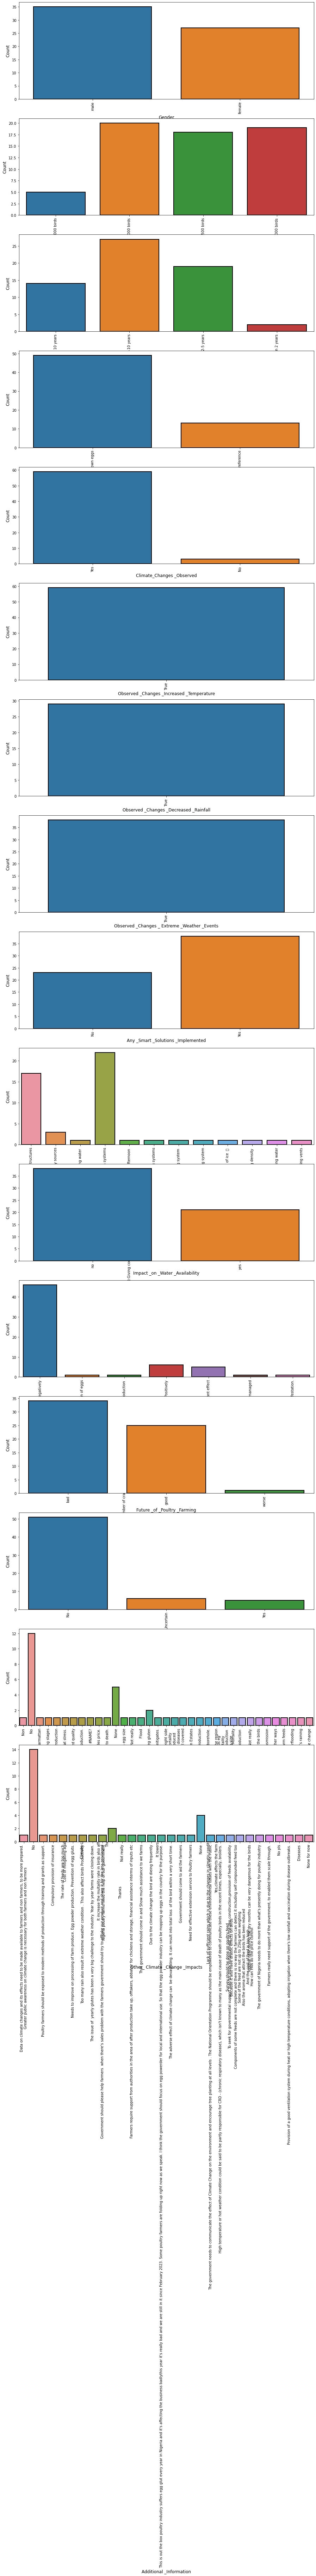

In [7]:
welfare_columns = ['Gender','Farm_Size', 'Years _in _Farming',
       'Egg _Preference', 'Climate_Changes _Observed',
       'Observed _Changes _Increased _Temperature',
       'Observed _Changes _Decreased _Rainfall',
       'Observed _Changes _ Extreme _Weather _Events',
       'Any _Smart _Solutions _Implemented', 'Implemented _Smart _Solutions',
       'Impact _on _Water _Availability',
       'Impact _on _Bird _Health _and _Productivity',
       'Future _of _Poultry _Farming',
       'Government _Support _Climate _Change_ Adaptation',
       'Other_ Climate _Change _Impacts', 'Additional _Information']
       
# Create subplots for each welfare column
fig, axes = plt.subplots(nrows=len(welfare_columns), figsize=(15, 6 * len(welfare_columns)))

# Iterate over welfare columns and create count plots
for i, column in enumerate(welfare_columns):
    ax = axes[i]
    sns.countplot(x=column, data=df, ax=ax, linewidth=2, edgecolor='black')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', labelrotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [8]:
df.columns

Index(['Establishment', 'Farm _Location ', 'Education_Level', 'Gender',
       'Production_system', 'Farm_Size', 'Years _in _Farming',
       'Egg _Preference', 'Climate_Changes _Observed',
       'Observed _Changes _Increased _Temperature',
       'Observed _Changes _Decreased _Rainfall',
       'Observed _Changes _ Extreme _Weather _Events',
       'Any _Smart _Solutions _Implemented', 'Implemented _Smart _Solutions',
       'Impact _on _Water _Availability',
       'Impact _on _Bird _Health _and _Productivity',
       'Future _of _Poultry _Farming',
       'Government _Support _Climate _Change_ Adaptation',
       'Other_ Climate _Change _Impacts', 'Additional _Information'],
      dtype='object')

In [9]:
# Correlation Analysis
# Create contingency tables and perform chi-square tests
welfare_columns = ['Gender','Farm_Size', 'Years _in _Farming',
       'Egg _Preference', 'Climate_Changes _Observed',
       'Observed _Changes _Increased _Temperature',
       'Observed _Changes _Decreased _Rainfall',
       'Observed _Changes _ Extreme _Weather _Events',
       'Any _Smart _Solutions _Implemented', 'Implemented _Smart _Solutions',
       'Impact _on _Water _Availability',
       'Impact _on _Bird _Health _and _Productivity',
       'Future _of _Poultry _Farming',
       'Government _Support _Climate _Change_ Adaptation',
       'Other_ Climate _Change _Impacts', 'Additional _Information']
behavior_columns = ['Education_Level']
production_columns = ['Establishment', 'Farm _Location ', 'Production_system', 'Production_system']


In [10]:
# Chi-square test for welfare and behavior
for welfare_column in welfare_columns:
    for behavior_column in behavior_columns:
        contingency_table = pd.crosstab(df[welfare_column], df[behavior_column])
        chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
        print(f'Chi-square test for {welfare_column} and {behavior_column}:')
        print(f'Chi-square statistic: {chi2:.4f}')
        print(f'p-value: {p_value:.4f}')
        print()

Chi-square test for Gender and Education_Level:
Chi-square statistic: 15.7879
p-value: 0.0714

Chi-square test for Farm_Size and Education_Level:
Chi-square statistic: 28.9020
p-value: 0.3657

Chi-square test for Years _in _Farming and Education_Level:
Chi-square statistic: 42.3753
p-value: 0.0302

Chi-square test for Egg _Preference and Education_Level:
Chi-square statistic: 11.8566
p-value: 0.2215

Chi-square test for Climate_Changes _Observed and Education_Level:
Chi-square statistic: 2.6017
p-value: 0.9780

Chi-square test for Observed _Changes _Increased _Temperature and Education_Level:
Chi-square statistic: 0.0000
p-value: 1.0000

Chi-square test for Observed _Changes _Decreased _Rainfall and Education_Level:
Chi-square statistic: 0.0000
p-value: 1.0000

Chi-square test for Observed _Changes _ Extreme _Weather _Events and Education_Level:
Chi-square statistic: 0.0000
p-value: 1.0000

Chi-square test for Any _Smart _Solutions _Implemented and Education_Level:
Chi-square statistic

In [11]:
# Crosstab analysis for welfare and production
for welfare_column in welfare_columns:
    for production_column in production_columns:
        cross_table = pd.crosstab(df[welfare_column], df[production_column])
        print(f'Cross-tabulation for {welfare_column} and {production_column}:')
        print(cross_table)
        print()


Cross-tabulation for Gender and Establishment:
Establishment  A.Y Farms.  ADEDAYO FARMS  AGROVENDCO FARMS  \
Gender                                                       
female                  0              0                 1   
male                    1              1                 0   

Establishment  Alau Integrated farms services  Amazon Farms  \
Gender                                                        
female                                      0             0   
male                                        1             1   

Establishment  Anagro Consults Ltd  BADEJI Enterprises  \
Gender                                                   
female                           1                   0   
male                             0                   1   

Establishment  Bahamas products limited  Barinda Farms  \
Gender                                                   
female                                0              0   
male                                  1     

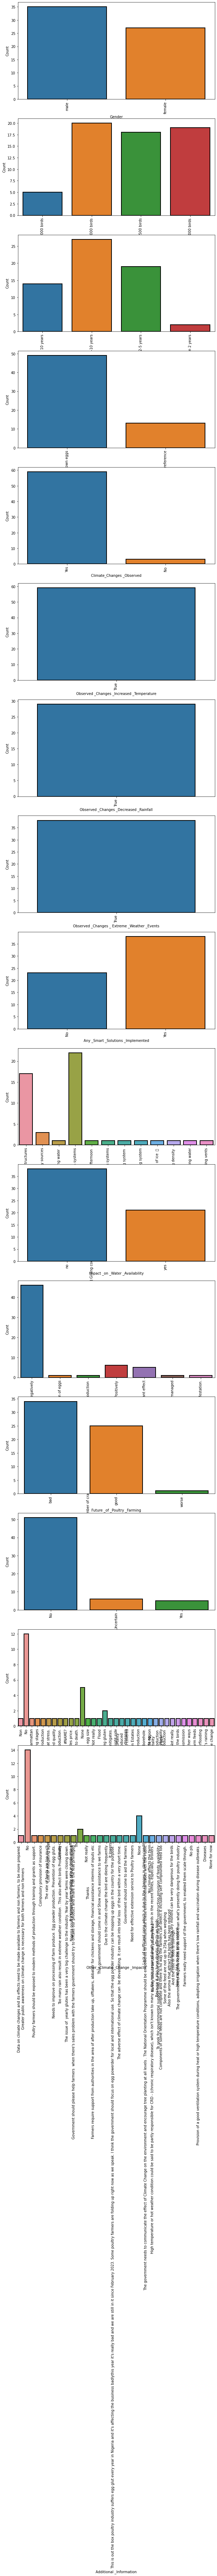

In [12]:
# Create subplots for each welfare column
fig, axes = plt.subplots(nrows=len(welfare_columns), figsize=(10, 6 * len(welfare_columns)))

# Iterate over welfare columns and create count plots
for i, column in enumerate(welfare_columns):
    ax = axes[i]
    sns.countplot(x=column, data=df, ax=ax, linewidth=2, edgecolor='black')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Check for missing data
print(df.isnull().sum())


Establishment                                        1
Farm _Location                                       0
Education_Level                                      0
Gender                                               0
Production_system                                    0
Farm_Size                                            0
Years _in _Farming                                   0
Egg _Preference                                      0
Climate_Changes _Observed                            0
Observed _Changes _Increased _Temperature            3
Observed _Changes _Decreased _Rainfall              33
Observed _Changes _ Extreme _Weather _Events        24
Any _Smart _Solutions _Implemented                   1
Implemented _Smart _Solutions                       11
Impact _on _Water _Availability                      3
Impact _on _Bird _Health _and _Productivity          1
Future _of _Poultry _Farming                         2
Government _Support _Climate _Change_ Adaptation     0
Other_ Cli

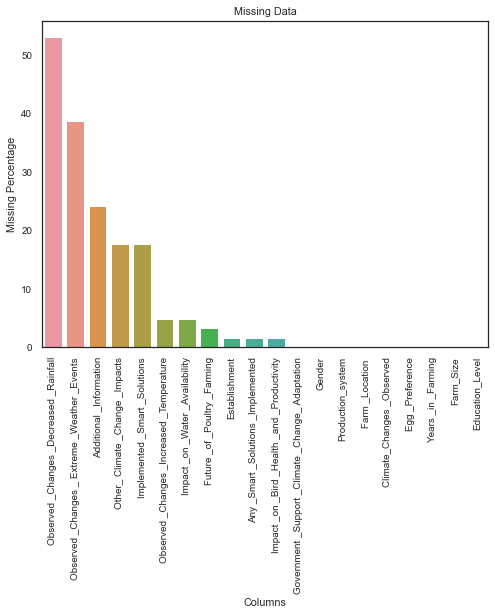

Dupe tie Enterprises                            2
Fepwotfarm                                      1
IRRIGATE AGRO                                   1
Gbemileke                                       1
Sarahjay farm                                   1
FLOWKIN ltd                                     1
Bazaru Nigeria Limited                          1
Food messenger farms                            1
Vip Tech and farms                              1
NURWAB INTEGRATED FARMS                         1
Alau Integrated farms services                  1
Zekhis Organic international ventures           1
BADEJI Enterprises                              1
Havillah Farms Ltd , Ota Ikosi, Agbowa          1
Boltun farms                                    1
Bishe Organic Farm                              1
Amazon Farms                                    1
SABAINAH FARMS ILADO BADAGRY . LAGOS NIGERIA    1
Latwins Farms Ltd                               1
SALOM Farms                                     1


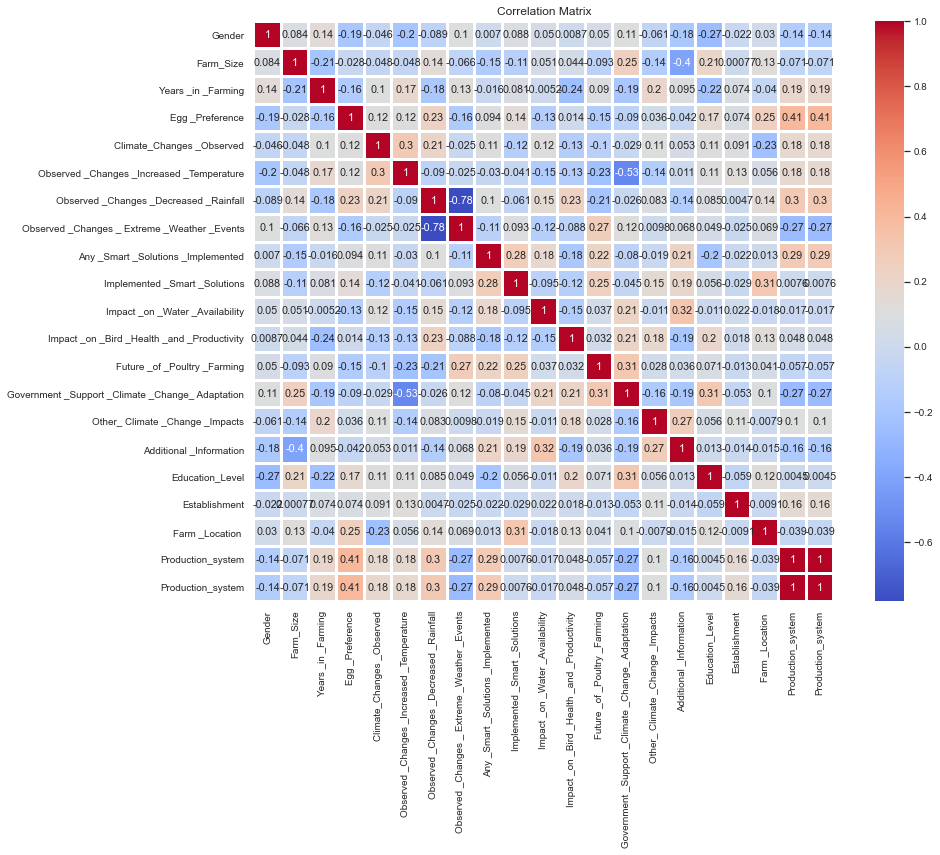

In [33]:

# Handling missing data
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data.sort_values(by='Missing Percentage', ascending=False, inplace=True)

# Plot missing data
plt.figure(figsize=(8, 6))
sns.barplot(x=missing_data.index, y=missing_data['Missing Percentage'])
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Missing Data')
plt.show()
categorical_columns = ['Establishment', 'Farm _Location ', 'Education_Level', 'Gender',
       'Production_system', 'Farm_Size', 'Years _in _Farming',
       'Egg _Preference', 'Climate_Changes _Observed',
       'Observed _Changes _Increased _Temperature',
       'Observed _Changes _Decreased _Rainfall',
       'Observed _Changes _ Extreme _Weather _Events',
       'Any _Smart _Solutions _Implemented', 'Implemented _Smart _Solutions',
       'Impact _on _Water _Availability',
       'Impact _on _Bird _Health _and _Productivity',
       'Future _of _Poultry _Farming',
       'Government _Support _Climate _Change_ Adaptation',
       'Other_ Climate _Change _Impacts', 'Additional _Information']

for column in categorical_columns:
    print(df[column].value_counts())
    print()

# Correlation Analysis
# Create correlation matrix for welfare, behavior, and production variables
welfare_columns = welfare_columns = ['Gender','Farm_Size', 'Years _in _Farming',
       'Egg _Preference', 'Climate_Changes _Observed',
       'Observed _Changes _Increased _Temperature',
       'Observed _Changes _Decreased _Rainfall',
       'Observed _Changes _ Extreme _Weather _Events',
       'Any _Smart _Solutions _Implemented', 'Implemented _Smart _Solutions',
       'Impact _on _Water _Availability',
       'Impact _on _Bird _Health _and _Productivity',
       'Future _of _Poultry _Farming',
       'Government _Support _Climate _Change_ Adaptation',
       'Other_ Climate _Change _Impacts', 'Additional _Information']
       
behavior_columns = ['Education_Level']
production_columns = ['Establishment', 'Farm _Location ', 'Production_system', 'Production_system']

# Encode categorical variables as numerical for correlation analysis
df_encoded = df.copy()
for column in welfare_columns + behavior_columns + production_columns:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

# Calculate correlation matrix
corr_matrix = df_encoded[welfare_columns + behavior_columns + production_columns].corr()

# Set figure size and spacing
plt.figure(figsize=(15, 12))
sns.set(font_scale=0.9)
sns.set_style('white')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=2.0)
plt.title('Correlation Matrix', fontsize=12)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=500)
plt.show()

* The correlation matrix provides a visual representation of the relationships between the encoded welfare, behavior, and production variables.
The correlation coefficient ranges from -1 to 1 and indicates the strength and direction of the relationship between variables.
A positive value close to 1 suggests a strong positive correlation, while a negative value close to -1 suggests a strong negative correlation. A value close to 0 indicates no significant correlation.
The heatmap uses a color gradient to represent the correlation coefficient values, with darker shades indicating stronger negative correlations and lighter shades representing stronger positive correlations.
Analyze the heatmap to identify patterns and correlations between the variables relevant to welfare, behavior, and production.
Look for strong positive or negative correlations that indicate relationships between these variables.
Consider the magnitude of the correlation coefficients to assess the strength of the relationships.
Remember that correlation does not imply causation, and further analysis is necessary to establish causal relationships and interpret the practical implications of the correlations within the context of your specific research question.
